In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

base_path = 'F:\Study\weiboPredict\data'


print('读取源微博...')
origin = pd.read_csv(base_path + '\\samples\\origin_train_tt.csv',
                     index_col='w_id',
                     sep='\001',
                     encoding='utf-8',
                     quoting=3)
print('读取转发...')
repo = pd.read_csv(base_path + '\\samples\\repo_train_tt.csv',
                   sep='\001',
                   encoding='utf-8',
                   quoting=3).fillna(value='', axis=1)

# 只取datetime中的time
origin.time = [t.time() for t in pd.to_datetime(origin.time)]

Populating the interactive namespace from numpy and matplotlib


读取源微博...
读取转发...

In [37]:
n_fans = {}
n_follows = {}
path = 'F:\\Study\\weiboPredict\\data\\adjlist.csv'

with open(path,encoding='utf-8') as f:
    for line in f:
        try:
            line = list(map(int,line.replace('\n','').split(',')))
            if not line[0] in n_follows:
                n_follows[line[0]] = len(line)-1
            for u in line[1:]:
                if u in n_fans:
                    n_fans[u] += 1
                else:
                    n_fans[u] = 1
        except ValueError :
            a=1

In [48]:
n_fans = pd.Series(n_fans)

In [49]:
n_fans.describe()

count    6.261994e+06
mean     1.118549e+02
std      5.196419e+03
min      1.000000e+00
25%      2.000000e+00
50%      6.000000e+00
75%      1.700000e+01
max      2.719365e+06
dtype: float64

In [50]:
n_follows = pd.Series(n_follows)
n_follows.describe()

count    7.934568e+06
mean     8.827631e+01
std      9.119573e+01
min      1.000000e+00
25%      3.300000e+01
50%      6.200000e+01
75%      1.120000e+02
max      3.072000e+03
dtype: float64

In [54]:
user_info = pd.DataFrame({'n_fans':n_fans,'n_follows':n_follows}).fillna(value=0, axis=1)

In [57]:
user_info.n_fans = user_info.n_fans.astype(int)
user_info.n_follows = user_info.n_follows.astype(int)
user_info.describe()

,n_fans,n_follows
count,7.977942e+06,7.977942e+06
mean,8.779638e+01,8.779638e+01
std,4.604014e+03,9.117885e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,3.200000e+01
50%,3.000000e+00,6.100000e+01
75%,1.200000e+01,1.120000e+02
max,2.719365e+06,3.072000e+03


In [58]:
user_info.to_csv(base_path+'\\user_info.csv',
                sep='\001',
                index_label='u_id',
                encoding='utf-8',
                quoting=3)

In [3]:
user_info = pd.read_csv(base_path+'\\user_info.csv',
                sep='\001',
                index_col='u_id',
                encoding='utf-8',
                quoting=3)

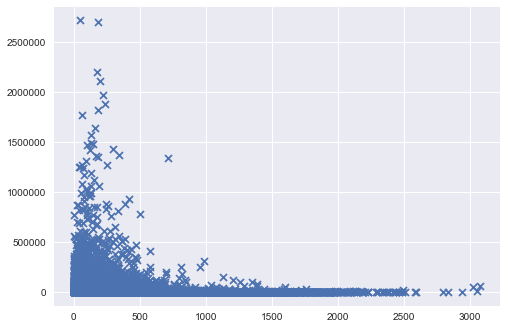

In [30]:
plt.clf()
plt.scatter(user_info.n_follows,user_info.n_fans,marker = 'x')